In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
!pip install opencv-python
import cv2
from PIL import Image

In [ ]:
# load the images from Goolge Drive

def loadImages(path):
    # Put files into lists and return them as one list of size 4
  image_files = sorted([os.path.join(path, file)
         for file in os.listdir(path) if      file.endswith('.jpg')])
  return image_files

image_path = "./dataset"
trainA_imgs = loadImages(image_path + "/trainA")

In [ ]:
len(trainA_imgs)

2000

# Visualization

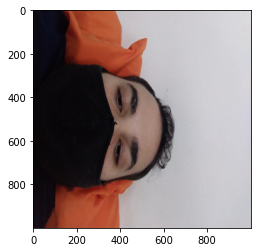

In [ ]:
# show the images
img = mpimg.imread(trainA_imgs[0])
RGB_img_a = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# load the information
info = pd.read_csv ("./df_part_4.csv")

In [ ]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       40000 non-null  int64  
 1   TYPE     40000 non-null  int64  
 2   USER_ID  40000 non-null  int64  
 3   GENDER   40000 non-null  object 
 4   AGE      40000 non-null  int64  
 5   name     40000 non-null  object 
 6   size_mb  40000 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 2.1+ MB


In [ ]:
# show the gender distribution of this dataset
gender_value = info['GENDER'].unique()
print(gender_value)

['MALE' 'FEMALE' 'NONE']


[15308, 16124, 8568]


<BarContainer object of 3 artists>

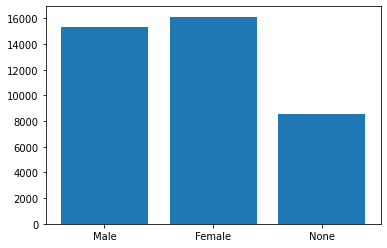

In [ ]:
male_counter = len(info[info['GENDER'] == 'MALE'])
female_counter = len(info[info['GENDER'] == 'FEMALE'])
none_counter = len(info[info['GENDER'] == 'NONE'])

label=['Male', 'Female','None']
label_count = [male_counter, female_counter, none_counter]
print(label_count)

#show the gender fidtribution plot
plt.bar(label, label_count)

In [ ]:
min_size = info['size_mb'].min()
max_size = info['size_mb'].max()
print(f"The image size is in the range of ({min_size}, {max_size})")

The image size is in the range of (0.010514259338378906, 14.36225128173828)


# Preprosessing

### Resizing

In [ ]:
from PIL import Image
res_trainA_imgs = []
for file in os.listdir("./dataset/trainA"):
  img = Image.open("./dataset/trainA/" + file)
  res_trainA_imgs.append(img.resize((500, 500)))

In [ ]:
res_trainB_imgs = []
for file in os.listdir("./dataset/trainB"):
  img = Image.open("./dataset/trainB/" + file)
  res_trainB_imgs.append(img.resize((500, 500)))

In [ ]:
testA_imgs = []
for file in os.listdir("./dataset/testA"):
  img = Image.open("./dataset/testA/" + file)
  testA_imgs.append(img)

In [ ]:
testB_imgs = []
for file in os.listdir("./dataset/testB"):
  img = Image.open("./dataset/testB/" + file)
  testB_imgs.append(img)

### Gaussian Blur

In [ ]:
# Remove noise
# Gaussian
from PIL import Image, ImageFilter 
def  remove_noise(data):
  no_noise = []
  for i in range(len(data)):
    blur = data[i].filter(ImageFilter.GaussianBlur(radius = 2))
    no_noise.append(blur)
  return no_noise

In [ ]:
blurred_trainA_imgs = remove_noise(res_trainA_imgs)
blurred_trainB_imgs = remove_noise(res_trainB_imgs)

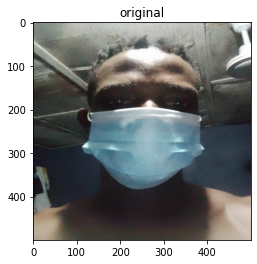

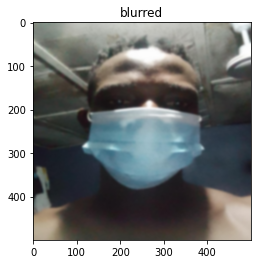

In [ ]:
# Visualizing the original image and the blurred images
plt.imshow(res_trainA_imgs[0])
plt.title('original')
plt.show()

plt.imshow(blurred_trainA_imgs[0])
plt.title('blurred')
plt.show()

In [ ]:
trainA_imgs.clear()
res_trainA_imgs.clear()
res_trainB_imgs.clear()

# Data Augmentation

In [ ]:
from PIL import Image, ImageEnhance
# Image Flipping
def flip(data):
  flip_imgs=[]
  count = 0
  for i in range(len(data)):
    if count < len(data)/2:
      flip_imgs.append(data[i].transpose(Image.FLIP_LEFT_RIGHT))
    elif count >= len(data)/2:
      flip_imgs.append(data[i].transpose(Image.FLIP_TOP_BOTTOM))
    count = count + 1
  return flip_imgs

# Increase brightness
def inc_brightness (data):
  bri_imgs = []
  for i in range(len(data)):
    enh_bri = ImageEnhance.Brightness(data[i])
    brightness = 1.5
    image_brightened = enh_bri.enhance(brightness)
    bri_imgs.append(image_brightened)
  return bri_imgs  

# Chroma enhancement
def chroma_enhance (data):
  chroma_imgs = []
  for i in range(len(data)):
    enh_col = ImageEnhance.Color(data[i])
    color = 1.5
    image_colored = enh_col.enhance(color)
    chroma_imgs.append(image_colored)
  return chroma_imgs

# Contrast enhancement
def contrast_enhance(data):
  contrast_imgs = []
  for i in range(len(data)):
    enh_con = ImageEnhance.Contrast(data[i])
    contrast = 1.5
    image_contrasted = enh_con.enhance(contrast)
    contrast_imgs.append(image_contrasted)
  return contrast_imgs

In [ ]:
flipped_trainA_imgs = flip(blurred_trainA_imgs)
flipped_trainB_imgs = flip(blurred_trainB_imgs)

In [ ]:
brightened_trainA_imgs = inc_brightness(flipped_trainA_imgs)
brightened_trainB_imgs = inc_brightness(flipped_trainB_imgs)

In [ ]:
chroma_trainA_imgs = chroma_enhance(brightened_trainA_imgs)
chroma_trainB_imgs = chroma_enhance(brightened_trainB_imgs)

In [ ]:
contrast_trainA_imgs = contrast_enhance(chroma_trainA_imgs)
contrast_trainB_imgs = contrast_enhance(chroma_trainB_imgs)

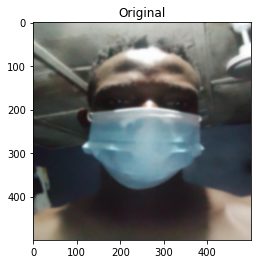

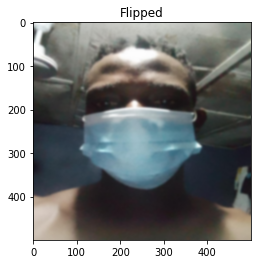

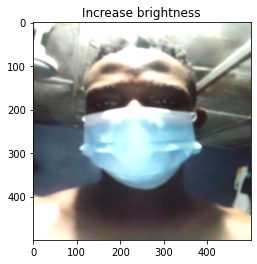

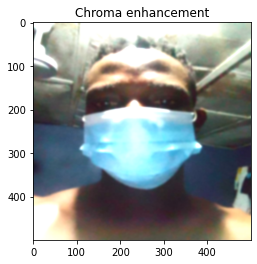

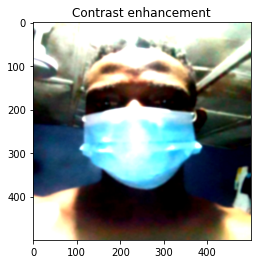

In [ ]:
plt.imshow(blurred_trainA_imgs[0])
plt.title('Original')
plt.show()

plt.imshow(flipped_trainA_imgs[0])
plt.title('Flipped')
plt.show()

plt.imshow(brightened_trainA_imgs[0])
plt.title('Increase brightness')
plt.show()

plt.imshow(chroma_trainA_imgs[0])
plt.title('Chroma enhancement')
plt.show()

plt.imshow(contrast_trainA_imgs[0])
plt.title('Contrast enhancement')
plt.show()

In [ ]:
blurred_trainA_imgs.clear()
blurred_trainB_imgs.clear()

flipped_trainA_imgs.clear()
flipped_trainB_imgs.clear()

brightened_trainA_imgs.clear()
brightened_trainB_imgs.clear()

chroma_trainA_imgs.clear()
chroma_trainB_imgs.clear()

In [ ]:
# !git clone https://github.com/Ha0Tang/AttentionGAN

fatal: destination path 'AttentionGAN' already exists and is not an empty directory.
/content/AttentionGAN


In [ ]:
%cd AttentionGAN/

In [ ]:
%cd datasets
os.mkdir("mask2nomask")
%cd mask2nomask
os.mkdir("trainA")
os.mkdir("trainB")
os.mkdir("testA")
os.mkdir("testB")
%cd ../..

count = 0
for file in contrast_trainA_imgs:
   file.save("./datasets/mask2nomask/trainA/"  + str(count) + ".jpg")
   count = count + 1

count = 0
for file in contrast_trainB_imgs:
   file.save("./datasets/mask2nomask/trainB/"  + str(count) + ".jpg")
   count = count + 1

count = 0
for file in testA_imgs:
   file.save("./datasets/mask2nomask/testA/"  + str(count) + ".jpg")
   count = count + 1

count = 0
for file in testB_imgs:
   file.save("./datasets/mask2nomask/testB/"  + str(count) + ".jpg")
   count = count + 1

[Errno 2] No such file or directory: 'datasets'
/content/AttentionGAN/datasets
/content/AttentionGAN/datasets/mask2nomask
/content/AttentionGAN


In [ ]:
!pip install -r requirements.txt

In [31]:
!sh ./scripts/train_attentiongan.sh

+ python train.py --dataroot ./datasets/mask2nomask --name mask2nomask_attentiongan --model attention_gan --dataset_mode unaligned --pool_size 50 --no_dropout --norm instance --lambda_A 10 --lambda_B 10 --lambda_identity 0.5 --load_size 286 --crop_size 152 --batch_size 8 --niter 60 --niter_decay 0 --gpu_ids 0 --display_id 0 --display_freq 100 --print_freq 100
----------------- Options ---------------
               batch_size: 8                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 152                           	[default: 256]
                 dataroot: ./datasets/mask2nomask        	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 100

In [32]:
!sh ./scripts/test_attentiongan.sh

+ python test.py --dataroot ./datasets/mask2nomask --name mask2nomask_attentiongan --model attention_gan --dataset_mode unaligned --norm instance --phase test --no_dropout --load_size 256 --crop_size 256 --batch_size 1 --gpu_ids 0 --num_test 1000000000 --saveDisk
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/mask2nomask        	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02         

In [33]:
 !zip -r i.zip results/mask2nomask_attentiongan/test_latest

  adding: results/mask2nomask_attentiongan/test_latest/ (stored 0%)
  adding: results/mask2nomask_attentiongan/test_latest/index.html (deflated 97%)
  adding: results/mask2nomask_attentiongan/test_latest/images/ (stored 0%)
  adding: results/mask2nomask_attentiongan/test_latest/images/28_fake_B.png (deflated 0%)
  adding: results/mask2nomask_attentiongan/test_latest/images/42_fake_A.png (deflated 0%)
  adding: results/mask2nomask_attentiongan/test_latest/images/23_fake_A.png (deflated 0%)
  adding: results/mask2nomask_attentiongan/test_latest/images/51_real_B.png (deflated 0%)
  adding: results/mask2nomask_attentiongan/test_latest/images/88_real_A.png (deflated 0%)
  adding: results/mask2nomask_attentiongan/test_latest/images/43_fake_A.png (deflated 0%)
  adding: results/mask2nomask_attentiongan/test_latest/images/13_fake_A.png (deflated 0%)
  adding: results/mask2nomask_attentiongan/test_latest/images/61_a10_a.png (stored 0%)
  adding: results/mask2nomask_attentiongan/test_latest/imag

In [34]:
import fnmatch
import os

path = "results/mask2nomask_attentiongan/test_latest/images"

# result_imgs = sorted([os.path.join(path, file)
#   for file in os.listdir(path) if      fnmatch.fnmatch(file, 'fake')])

result_imgs=[]
count = 0
for file in os.listdir(path):
  # print(file)
  if file.find("fake") != -1:
    if count < 50:
      result_imgs.append(file)
    count = count + 1

In [35]:
x = np.array([np.array(Image.open(path+'/'+fname)) for fname in result_imgs])

In [57]:
from math import floor
from numpy import ones
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import std
from numpy import exp
from numpy.random import shuffle
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets import cifar10
from skimage.transform import resize
from numpy import asarray

# scale an array of images to a new size
def scale_images(images, new_shape):
    images_list = list()
    for image in images:
        # resize with nearest neighbor interpolation
        new_image = resize(image, new_shape, 0)
        # store
        images_list.append(new_image)
    return asarray(images_list)
 
# assumes images have any shape and pixels in [0,255]
def calculate_inception_score(images, n_split=10, eps=1E-16):
    # load inception v3 model
    model = InceptionV3()
    # enumerate splits of images/predictions
    scores = list()
    n_part = floor(images.shape[0] / n_split)
    for i in range(n_split):
        # retrieve images
        ix_start, ix_end = i * n_part, (i+1) * n_part
        subset = images[ix_start:ix_end]
        # convert from uint8 to float32
        subset = subset.astype('float32')
        # scale images to the required size
        subset = scale_images(subset, (299,299,3))
        # pre-process images, scale to [-1,1]
        subset = preprocess_input(subset)
        # predict p(y|x)
        p_yx = model.predict(subset)
        # calculate p(y)
        p_y = expand_dims(p_yx.mean(axis=0), 0)
        # calculate KL divergence using log probabilities
        kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
        # sum over classes
        sum_kl_d = kl_d.sum(axis=1)
        # average over images
        avg_kl_d = mean(sum_kl_d)
        # undo the log
        is_score = exp(avg_kl_d)
        # store
        scores.append(is_score)
    # average across images
    is_avg, is_std = mean(scores), std(scores)
    return is_avg, is_std

In [58]:
result_imgs = np.array(result_imgs)
is_avg, is_std = calculate_inception_score(x)

In [59]:
print('score', is_avg, is_std)

score 2.90809 0.61803687
